<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [1]:
from typing import List
import requests

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """
    # add your code here
    url = "https://archive-api.open-meteo.com/v1/archive"

    features = ','.join(features)
    print("features:", features)
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone": "GMT"
    }

    response = requests.get(url, params = params)
    print("response: ", response.text)
    print("response_text: ", response.text)
    response.raise_for_status()
    return response.json()
    

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [2]:
# add your code here
import pandas as pd
feature_list = ["temperature_2m_max","temperature_2m_min","temperature_2m_mean","precipitation_sum"]
latitude = 52.52
longitude = 13.41
start_date = "1950-01-01"
end_date = "1954-12-31"
response = acquire_data(latitude, longitude, start_date, end_date, feature_list)
print("response_json: ", response)
data = response.pop("daily")
df = pd.DataFrame(data)
df.head

features: temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum
response:  {"latitude":52.5,"longitude":13.400009,"generationtime_ms":1.8650293350219727,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":38.0,"daily_units":{"time":"iso8601","temperature_2m_max":"°C","temperature_2m_min":"°C","temperature_2m_mean":"°C","precipitation_sum":"mm"},"daily":{"time":["1950-01-01","1950-01-02","1950-01-03","1950-01-04","1950-01-05","1950-01-06","1950-01-07","1950-01-08","1950-01-09","1950-01-10","1950-01-11","1950-01-12","1950-01-13","1950-01-14","1950-01-15","1950-01-16","1950-01-17","1950-01-18","1950-01-19","1950-01-20","1950-01-21","1950-01-22","1950-01-23","1950-01-24","1950-01-25","1950-01-26","1950-01-27","1950-01-28","1950-01-29","1950-01-30","1950-01-31","1950-02-01","1950-02-02","1950-02-03","1950-02-04","1950-02-05","1950-02-06","1950-02-07","1950-02-08","1950-02-09","1950-02-10","1950-02-11","1950-02-12","1950-02-13","1950-02-14"

<bound method NDFrame.head of             time  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0     1950-01-01                -1.8                -4.6                 -3.2   
1     1950-01-02                 2.8                -2.2                  0.5   
2     1950-01-03                 3.4                 1.1                  2.3   
3     1950-01-04                 1.1                -2.9                 -0.5   
4     1950-01-05                -1.4                -3.5                 -2.6   
...          ...                 ...                 ...                  ...   
1821  1954-12-27                 6.9                 5.1                  6.1   
1822  1954-12-28                 8.8                 6.3                  7.7   
1823  1954-12-29                 8.4                -0.2                  5.5   
1824  1954-12-30                 1.5                -2.1                 -0.0   
1825  1954-12-31                 1.4                -1.3                  0.2  

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


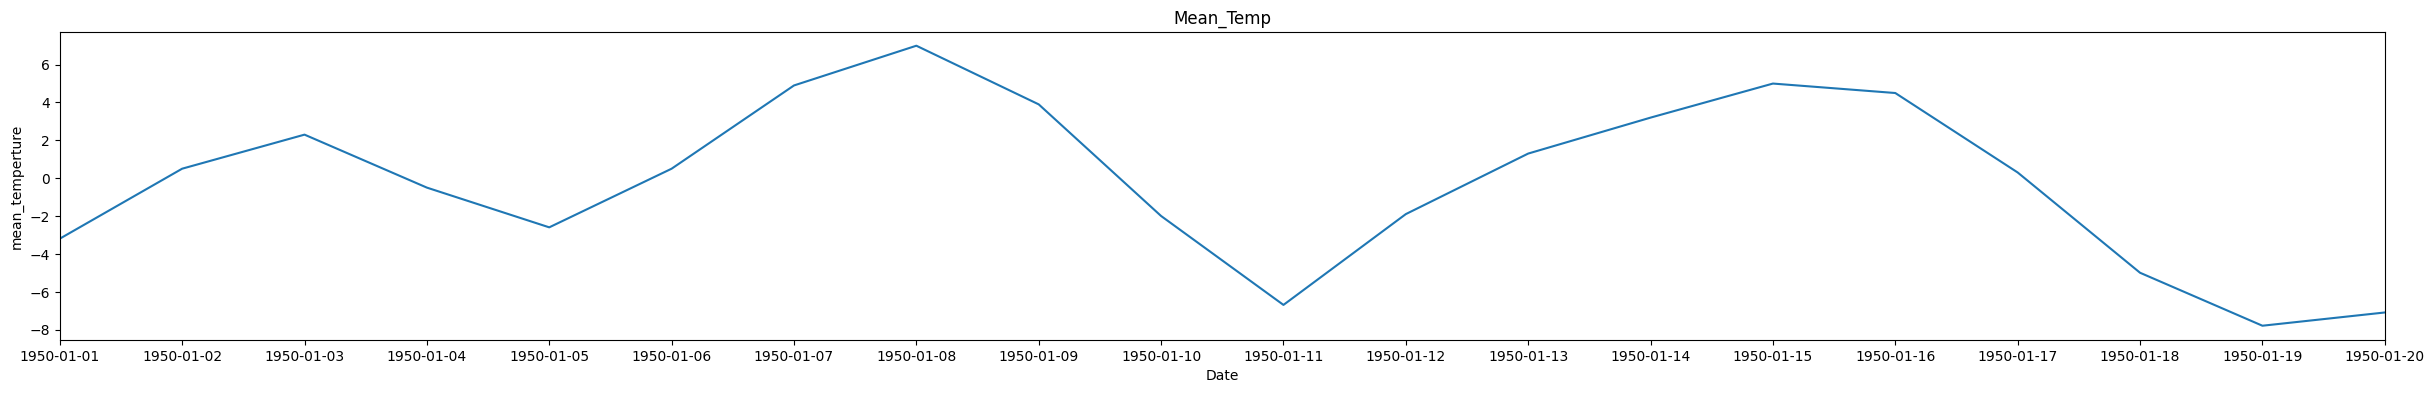

In [3]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize = (30,4))
    ax.plot(x,y)
    ax.margins(x = 0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    return fig, ax

x = df["time"][0:20]
y = df["temperature_2m_mean"][0:20]
fig1, ax1 = lineplot(x, y, "Mean_Temp", "Date", "mean_temperture")

plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

[0    -3.2
1     0.5
2     2.3
3    -0.5
4    -2.6
5     0.5
6     4.9
7     7.0
8     3.9
9    -2.0
10   -6.7
11   -1.9
12    1.3
13    3.2
14    5.0
15    4.5
16    0.3
17   -5.0
18   -7.8
19   -7.1
Name: temperature_2m_mean, dtype: float64, 0     -4.6
1     -2.2
2      1.1
3     -2.9
4     -3.5
5     -3.6
6      3.1
7      5.1
8      1.7
9     -4.4
10    -9.0
11    -9.5
12    -0.0
13    -0.1
14     3.1
15     0.4
16    -2.0
17    -7.3
18   -10.6
19    -9.1
Name: temperature_2m_min, dtype: float64]


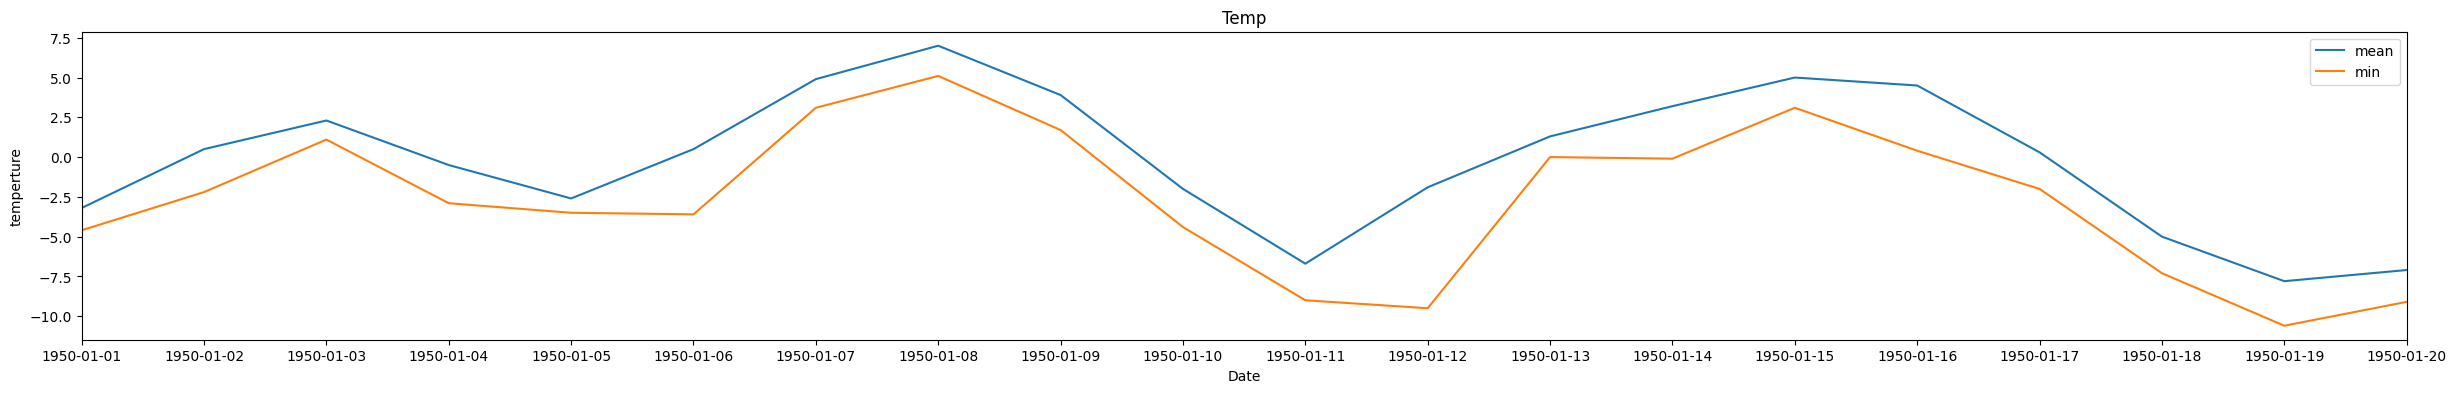

In [4]:
def lineplots2(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize = (30,4))
    for y,label in zip(ys, legend):
        ax.plot(x, y, label = label)
    ax.margins(x = 0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    return fig, ax

x = df["time"][0:20]
y = [df["temperature_2m_mean"][0:20], df["temperature_2m_min"][0:20]]
print(y)
fig, ax = lineplots2(x, y, "Temp", "Date", "temperture", ["mean", "min"])
plt.show()
    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


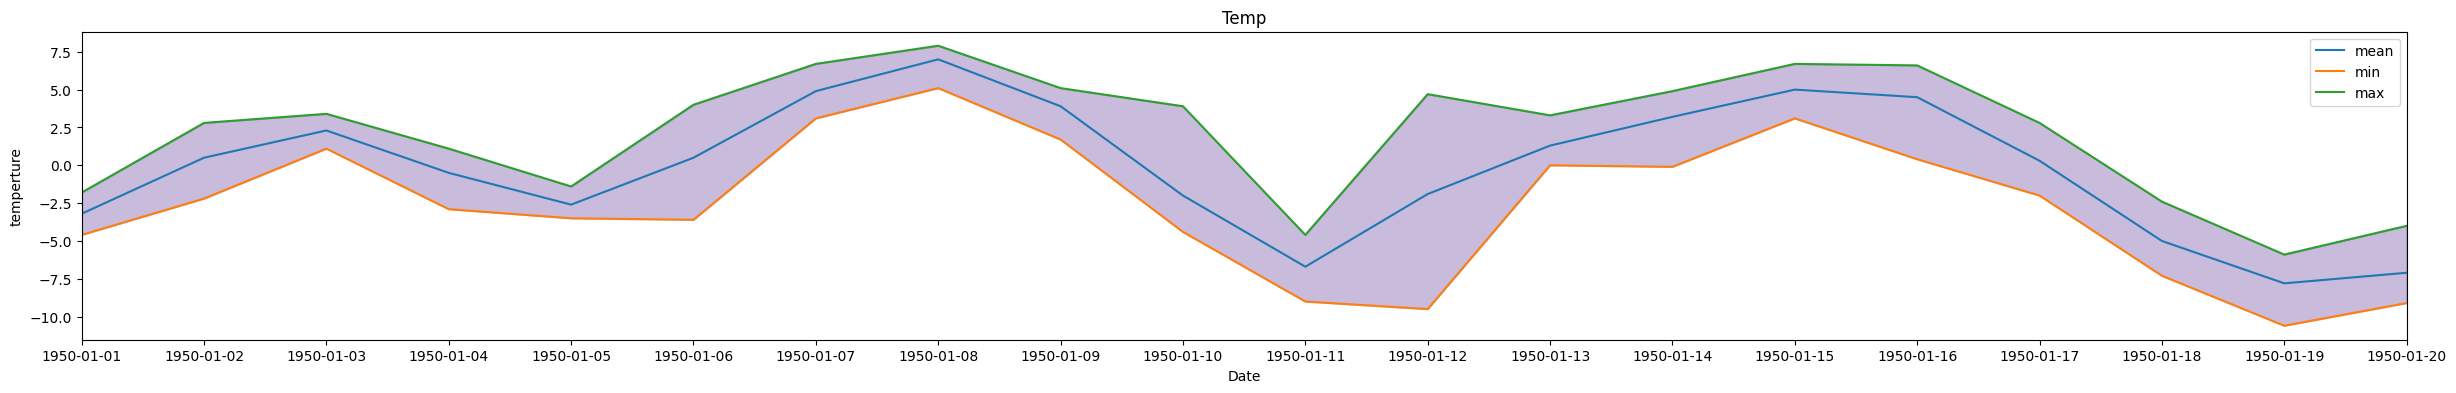

In [5]:
# add your code here
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize = (30,4))
    for y,label in zip(ys, legend):
        ax.plot(x, y, label = label)
    ax.margins(x = 0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    return fig, ax

x = df["time"][0:20]
y = [df["temperature_2m_mean"][0:20], df["temperature_2m_min"][0:20], df["temperature_2m_max"][0:20]]
fig, ax = lineplots(x, y, "Temp", "Date", "temperture", ["mean", "min", "max"])
clr = plt.cm.Purples(0.9)
ax.fill_between(x, y[1], y[2], alpha=0.3, edgecolor=clr, facecolor=clr)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

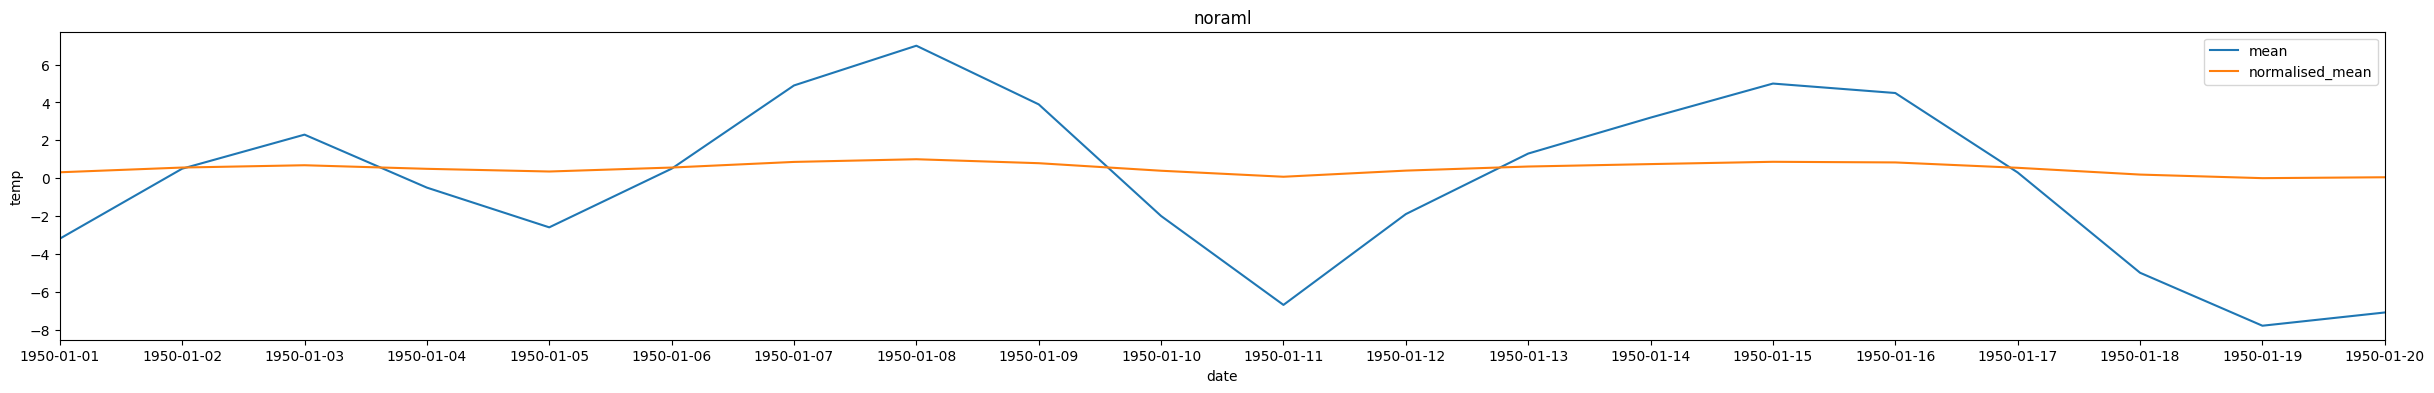

In [6]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    x = np.array(x)
    min_val = np.min(x)
    max_val = np.max(x)

    if min_val == max_val:
        raise ValueError("min = max, 0")
    
    normalized_x = (x - min_val) / (max_val - min_val)
    
    return normalized_x
n_temp_mean = minmax_norm(df["temperature_2m_mean"][0:20])
y = [df["temperature_2m_mean"][0:20], n_temp_mean]
fig, ax = lineplots2(x,y,"noraml", "date", "temp", ["mean", "normalised_mean"])
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [7]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [8]:
# threshold = 2 !!!
def zscore_outliers(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    mean = x.mean()
    std = x.std()
    zscore = (x-mean) / std
    print("max: ", np.max(zscore))
    outlier_index = np.where(np.abs(zscore) > threshold)
    return outlier_index
temp_mean = np.array(df["temperature_2m_mean"])
print(temp_mean)
outlier_index = zscore_outliers(temp_mean)
print(outlier_index)
print(temp_mean[outlier_index])

[-3.2  0.5  2.3 ...  5.5 -0.   0.2]
max:  2.0831253394945777
(array([  18,   19,   59,   60,  361,  362,  363,  364,  365, 1066, 1083,
       1110, 1133, 1134, 1135, 1466, 1467, 1471, 1486, 1487, 1488, 1489,
       1490, 1491, 1492, 1493, 1494, 1495, 1496, 1498, 1499, 1508, 1509,
       1510, 1511, 1512, 1513, 1514, 1631, 1632], dtype=int64),)
[ -7.8  -7.1  -7.7  -8.7  -7.7 -10.  -13.2 -14.9  -8.6  -8.6  -8.8  -8.
  -7.5 -14.2 -11.6  -8.6  -7.3  -7.5 -12.5 -11.1  -8.8  -7.5 -12.6 -15.6
 -16.  -12.6  -9.4  -9.3  -8.4  -7.8  -9.   -9.6  -8.   -8.9 -10.8 -11.7
 -10.9  -9.3  24.9  25.4]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

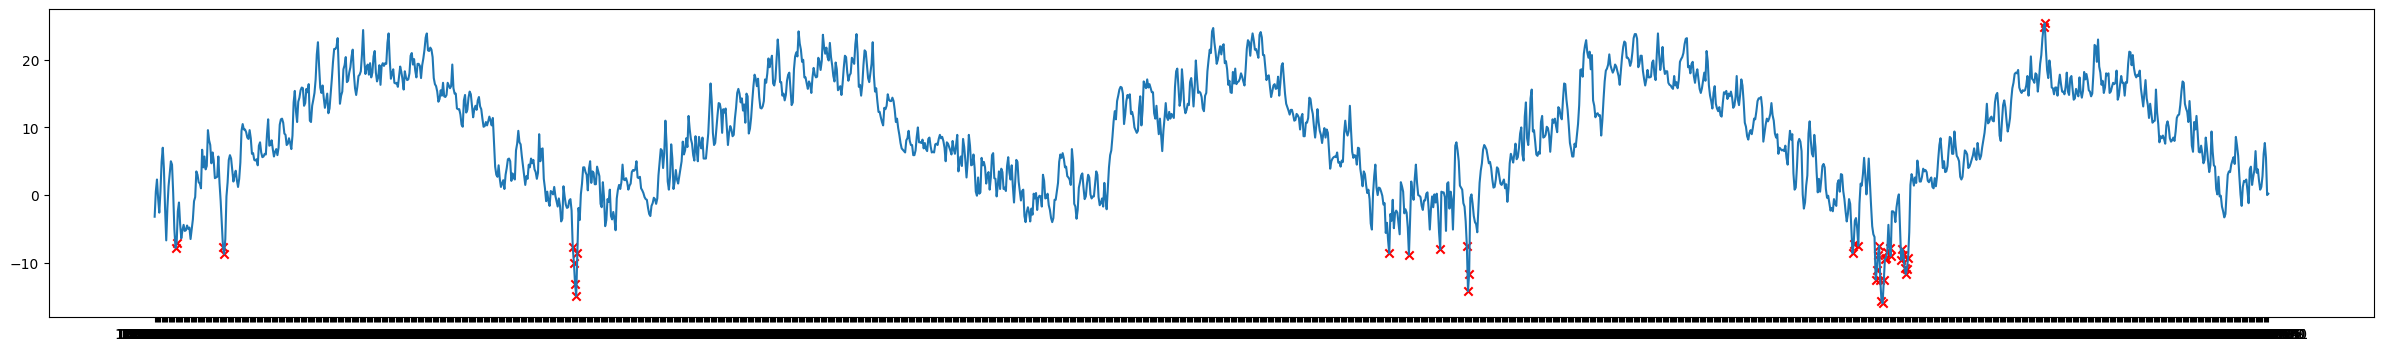

In [48]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    ax.plot(x,y, label = "ori")
    ax.scatter(x[outliers_idx], y[outliers_idx], label = 'outlier', color = 'r', marker= 'x')
times = df["time"].values
fig,ax = plt.subplots(1,figsize = (30,4))
ax = mark_outliers(ax, times, temp_mean, outlier_index)
plt.show()


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


In [10]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data


* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


In [11]:
def zscore_clamp(x: ArrayLike, threshold: int=2) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    x = np.array(x)
    mean = np.mean(x)
    std = np.std(x)
    
    # Calculate the z-score for each data point
    zscore = (x - mean) / std
    p10 = np.percentile(zscore, 10)
    p90 = np.percentile(zscore, 90)
    print(p10)
    print(p90)
    # what's the meaning of this question????????????????
    clamped_zscore = np.clip(zscore,p10, p90)
    clamped_data = clamped_zscore * std + mean
    return clamped_data

clamped_temp_mean = zscore_clamp(temp_mean)
    

-1.2825070016085018
1.2829938772700724


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


[   0    1    2 ... 1823 1824 1825]


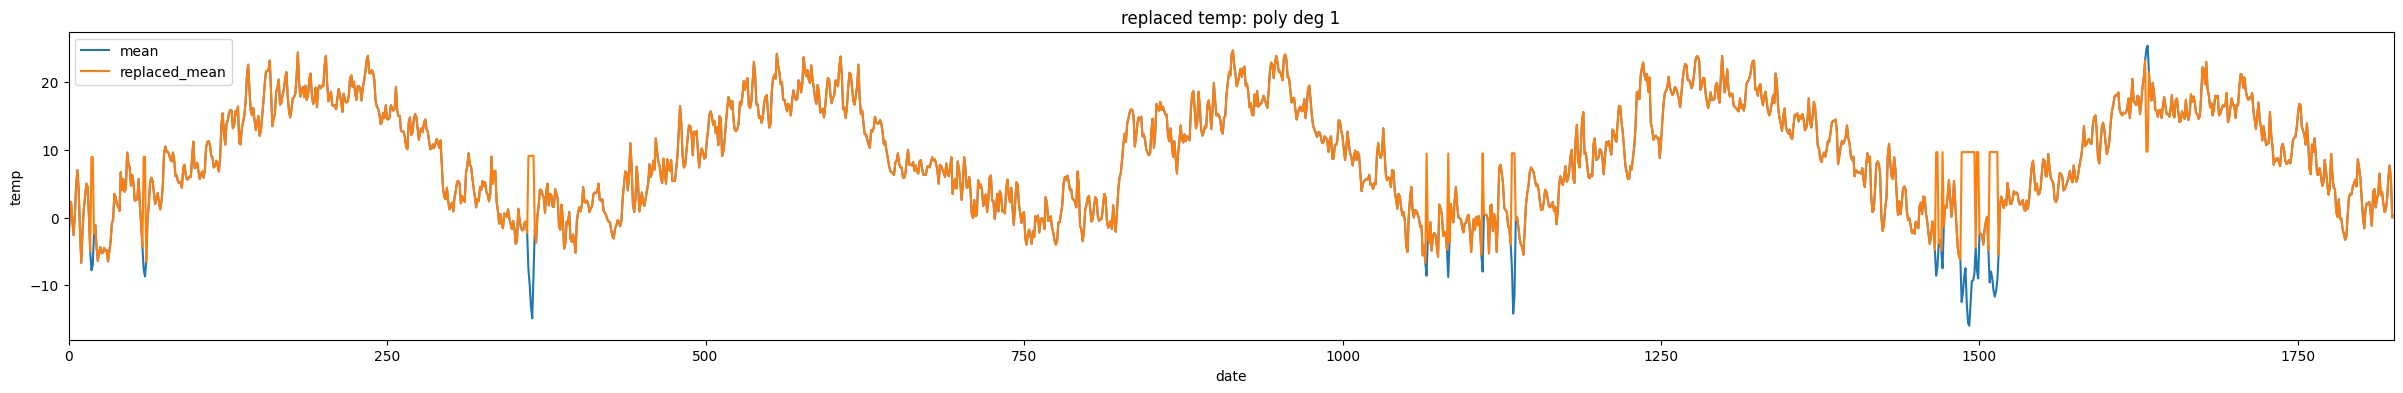

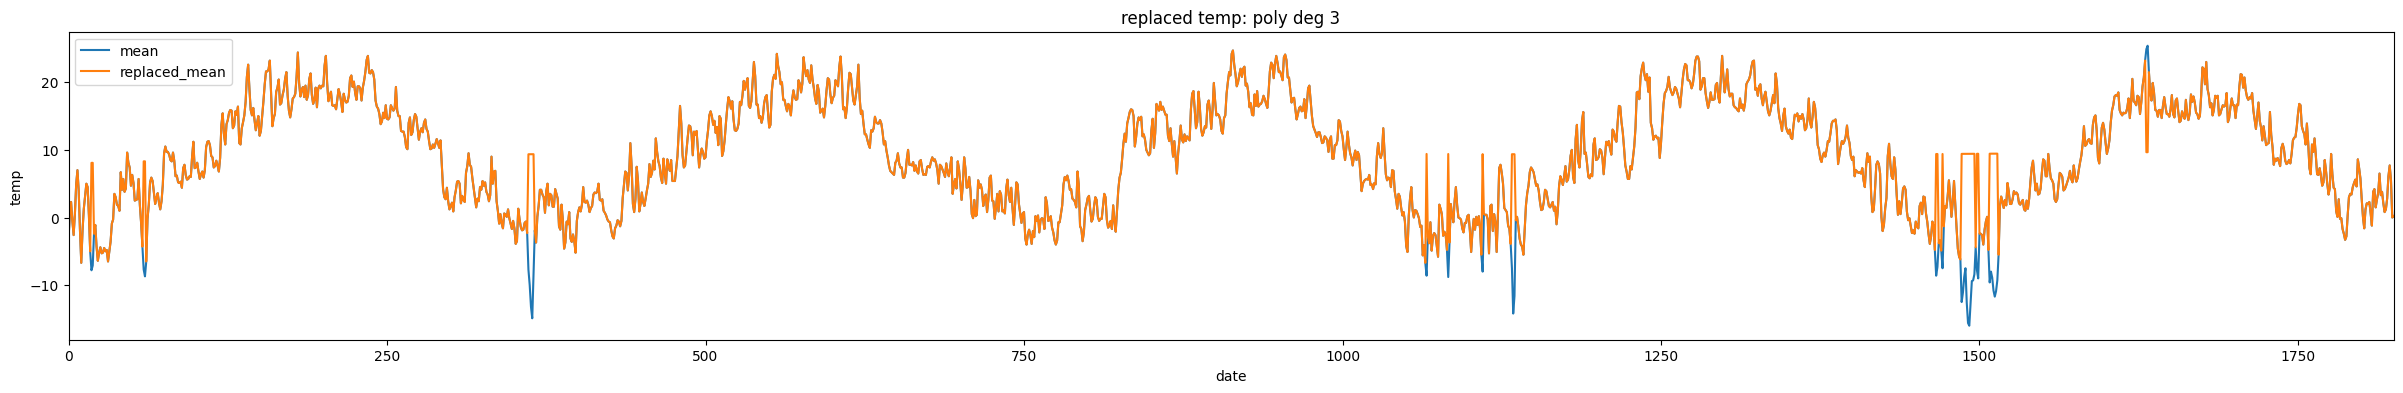

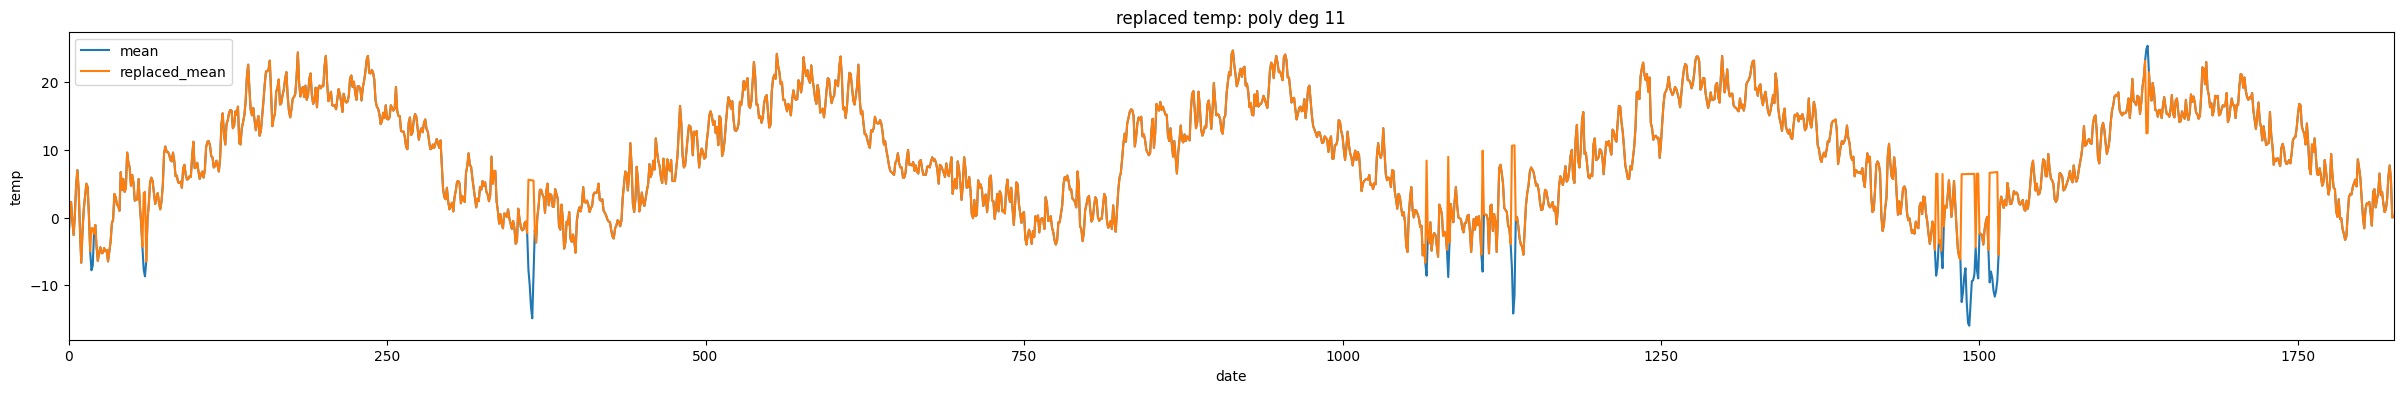

C:\Users\xrw\AppData\Local\Temp\ipykernel_11656\2966281215.py:27: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit(x[mask], y_non_outlier, deg = deg)


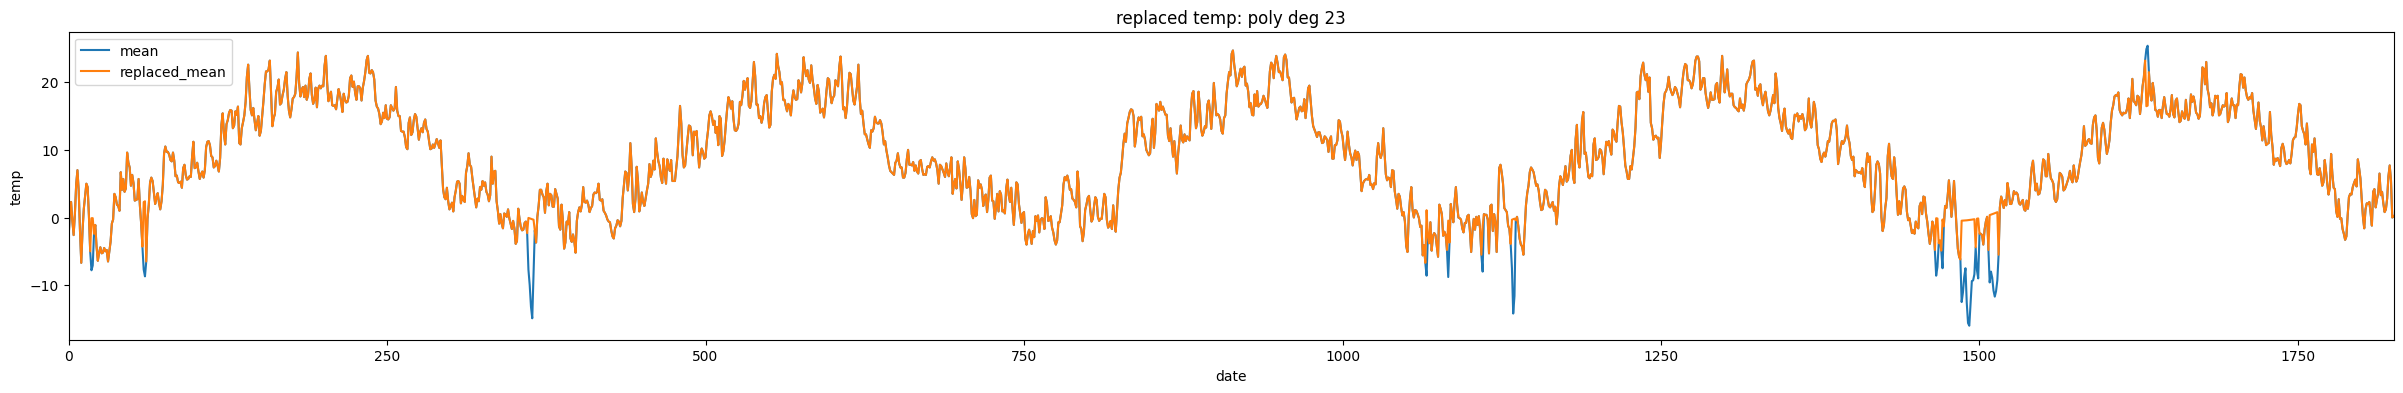

In [70]:
from datetime import datetime
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=2, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    mean = np.mean(y)
    std = np.std(y)
    
    # Calculate the z-scores
    zscores = np.abs((y - mean) / std)
    outlier_idx = np.where(np.abs(zscores) > threshold)
    
    mask = np.ones(len(y), dtype=bool)
    mask[outlier_idx] = False

    y_non_outlier = y[mask]
    p = np.polyfit(x[mask], y_non_outlier, deg = deg)

    interpolated_y = np.copy(y)
    interpolated_y[outlier_idx] = np.polyval(p, x[outlier_idx])
    return interpolated_y

times = np.arange(0,len(df["time"].values),1)
print(times)
replaced_mean_temp = zscore_interp(times, temp_mean)
new_y = [temp_mean, replaced_mean_temp]
fig, ax = lineplots2(times,new_y,"replaced temp: poly deg 1", "date", "temp", ["mean", "replaced_mean"])
plt.show()
replaced_mean_temp2 = zscore_interp(times, temp_mean, deg=3)
new_y = [temp_mean, replaced_mean_temp2]
fig2, ax2 = lineplots2(times,new_y,"replaced temp: poly deg 3", "date", "temp", ["mean", "replaced_mean"])
plt.show()
replaced_mean_temp3 = zscore_interp(times, temp_mean, deg=11)
new_y = [temp_mean, replaced_mean_temp3]
fig3, ax3 = lineplots2(times,new_y,"replaced temp: poly deg 11", "date", "temp", ["mean", "replaced_mean"])
plt.show()
replaced_mean_temp3 = zscore_interp(times, temp_mean, deg=23)
new_y = [temp_mean, replaced_mean_temp3]
fig4, ax4 = lineplots2(times,new_y,"replaced temp: poly deg 23", "date", "temp", ["mean", "replaced_mean"])
plt.show()
